# Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
salary_data=pd.read_csv('Salary_Data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
salary_data.shape

(30, 2)

In [7]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Linearity check

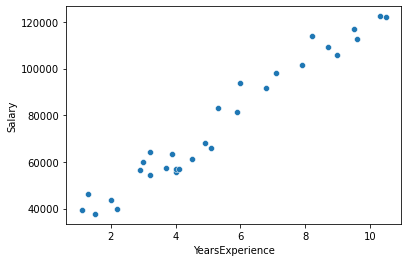

In [10]:
sns.scatterplot(x='YearsExperience',y='Salary',data=salary_data)
plt.show()

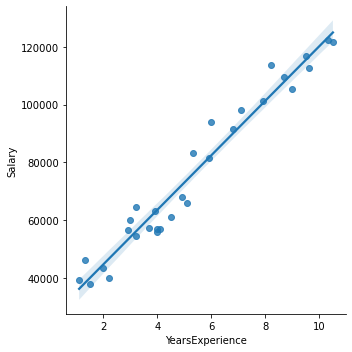

In [11]:
sns.lmplot( x='YearsExperience',y='Salary',data=salary_data)
plt.show()

# Normality check

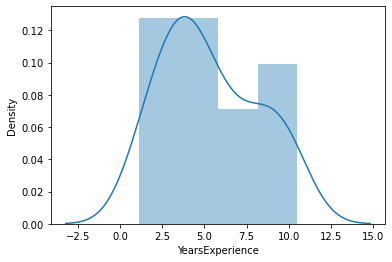

In [12]:
sns.distplot(a=salary_data["YearsExperience"],hist=True)
plt.show()

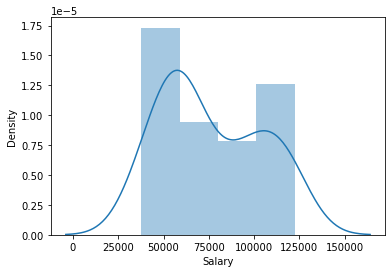

In [13]:
sns.distplot(a=salary_data['Salary'],hist=True)
plt.show()

In [14]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Data preparation

In [15]:
salary_data.rename(columns={"YearsExperience":'YE','Salary':'S'},inplace=True)

In [16]:
salary_data.head()

,YE,S
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Model building

In [17]:
linear_reg_model1=smf.ols(formula=('S~YE'),data=salary_data).fit()

In [18]:
prediction=linear_reg_model1.predict(salary_data['YE']).round(2)

In [19]:
prediction

0      36187.16
1      38077.15
2      39967.14
3      44692.12
4      46582.12
5      53197.09
6      54142.09
7      56032.08
8      56032.08
9      60757.06
10     62647.05
11     63592.05
12     63592.05
13     64537.05
14     68317.03
15     72097.02
16     73987.01
17     75877.00
18     81546.98
19     82491.97
20     90051.94
21     92886.93
22    100446.90
23    103281.89
24    108006.87
25    110841.86
26    115566.84
27    116511.84
28    123126.81
29    125016.80
dtype: float64

In [20]:
linear_reg_model1.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

In [21]:
linear_reg_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        23:08:25   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
error=salary_data['S']-prediction
error

0      3155.84
1      8127.85
2     -2236.14
3     -1167.12
4     -6691.12
5      3444.91
6      6007.91
7     -1587.08
8      8412.92
9     -3568.06
10      570.95
11    -7798.05
12    -6635.05
13    -7456.05
14    -7206.03
15    -4159.02
16    -7958.01
17     7211.00
18     -183.98
19    11448.03
20     1686.06
21     5386.07
22      855.10
23    10530.11
24     1424.13
25    -5259.86
26     1402.16
27    -3876.84
28     -735.81
29    -3144.80
dtype: float64

# log Transformation

In [23]:
salary_data['log_YE']=np.log(salary_data['YE']+1)

In [24]:
def diagnostic_plot(df,variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

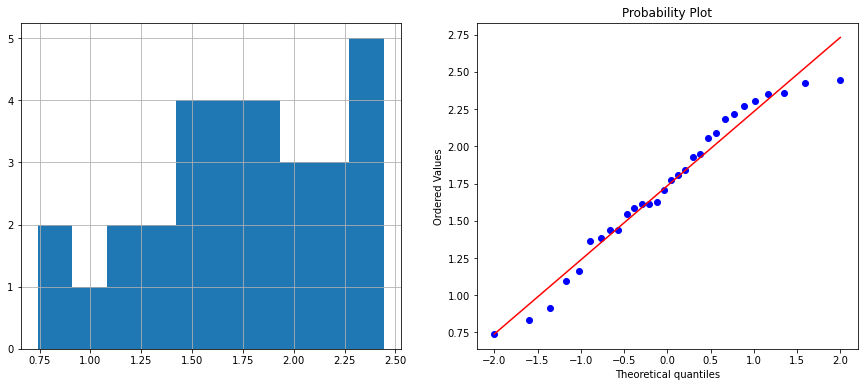

In [25]:
diagnostic_plot(salary_data,"log_YE")

### Model building and training using log transferd independent feature

In [26]:
lin_reg_model2=smf.ols(formula="S~log_YE",data=salary_data).fit()

In [27]:
lin_reg_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           3.30e-15
Time:                        23:08:27   Log-Likelihood:                -314.88
No. Observations:                  30   AIC:                             633.8
Df Residuals:                      28   BIC:                             636.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.645e+04   6222.341     -2.644      0.013   -2.92e+04   -3706.414
log_YE      5.327e+04   3456.242     15.413      0.000    4.62e+04    6.04e+04
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.678
Skew:                           0.048   Prob(JB):                        0.712
Kurtosis:                       2.270   Cond. No.                         8.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Reciprocal transformation

In [28]:
salary_data['recp_YE']=1/(salary_data['YE']+1)

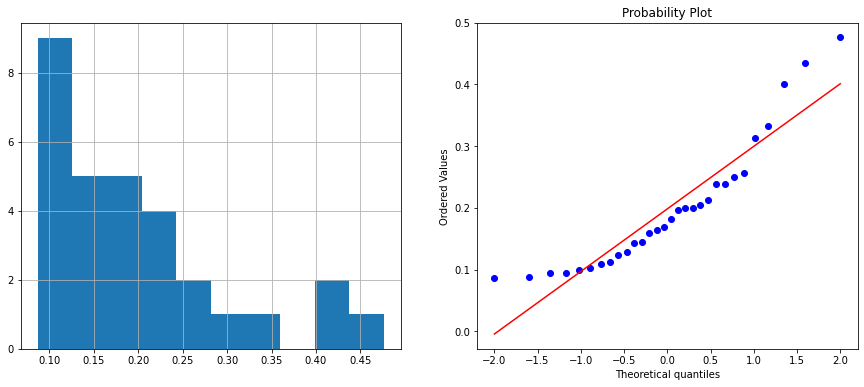

In [29]:
diagnostic_plot(salary_data,"recp_YE")

## Model building using reciprocal transformed independent feature

In [30]:
lin_reg_model3=smf.ols(formula="S~recp_YE",data=salary_data).fit()

In [31]:
lin_reg_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     73.45
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           2.58e-09
Time:                        23:08:28   Log-Likelihood:                -329.31
No. Observations:                  30   AIC:                             662.6
Df Residuals:                      28   BIC:                             665.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.204e+05   5834.566     20.642      0.000    1.08e+05    1.32e+05
recp_YE    -2.239e+05   2.61e+04     -8.570      0.000   -2.77e+05    -1.7e+05
==============================================================================
Omnibus:                        5.402   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                2.000
Skew:                           0.222   Prob(JB):                        0.368
Kurtosis:                       1.815   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

In [32]:
# From all the models we can choose the linear_reg_model1 because it has more r squared value and also low AIC and BIC values